<a href="https://colab.research.google.com/github/yuhannie7/AI_in_tranportation/blob/main/exercise2_yuhannie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and prepare the data





In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/main/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [4]:
df.shape

(2179, 9)

Shows basic information about the dataset, non-null values, data types, and so on.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


For ease of operation, select the data in rows 1001 to 2000

In [6]:
df = df.iloc[1000:2000]

Delete unneeded columns.

In [7]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Plotting histograms

<Axes: xlabel='Arrival_delay', ylabel='Count'>

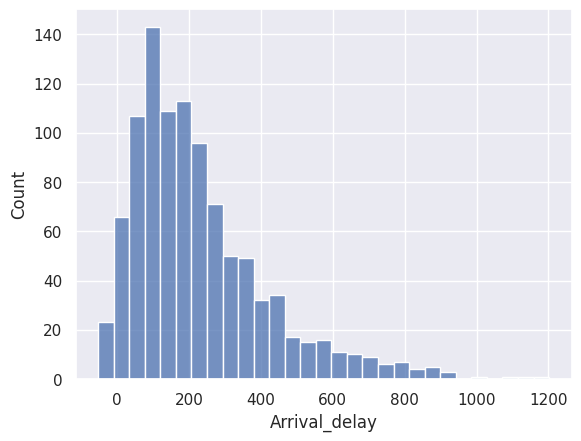

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.histplot(x=df['Arrival_delay'])

Calculate the correlation between the columns in the DataFrame df and sort the correlation coefficients associated with the Arrival_delay column in descending order

In [9]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.994148
Dwell_time,0.218749
Recurrent_delay,0.185919
Scheduled_travel_time,0.111700


In [10]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

Visualisation Relationship between features.

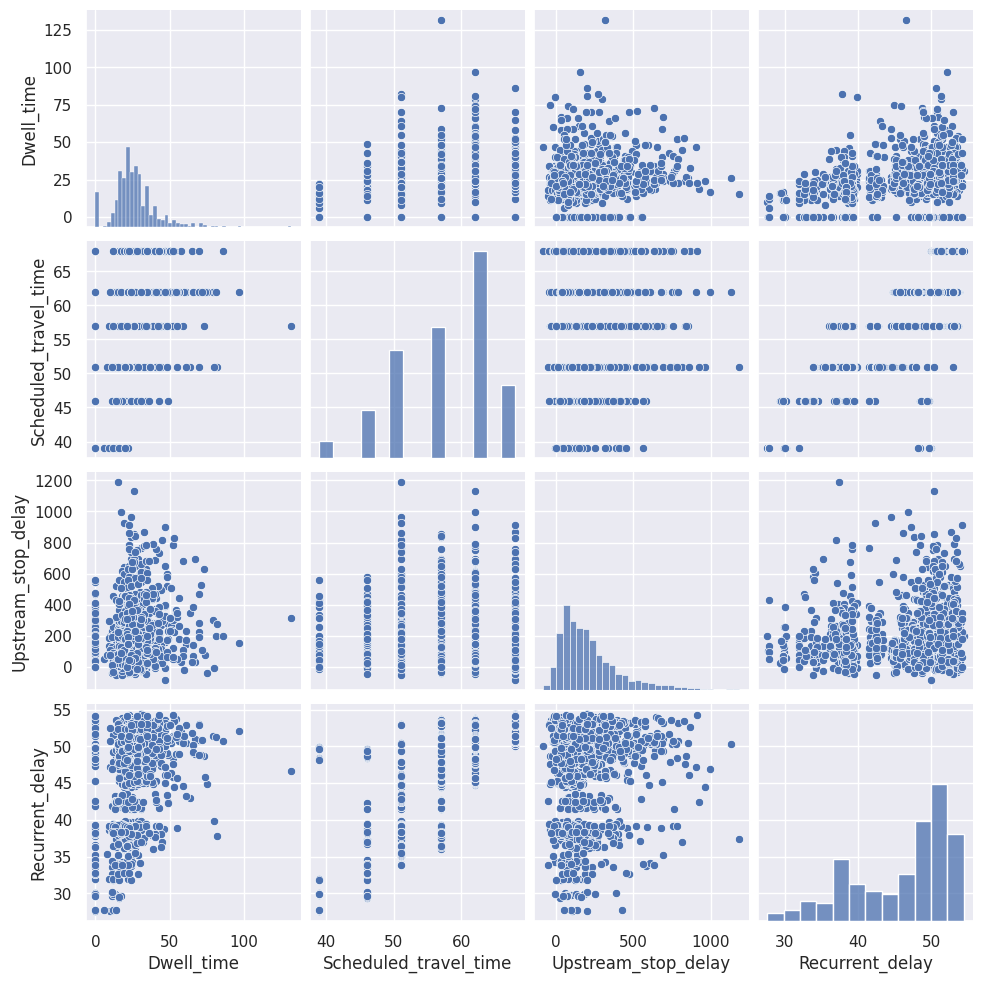

In [11]:
sns.pairplot(x)

# Train / Test Split

In [12]:
from sklearn.model_selection import train_test_split

Split the dataset, 20% for the test set and 80% for the training set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Develop a xGBoost model

Importing libraries

In [14]:
import xgboost as xgb

build a model

In [15]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

train the model with the data prepared in the previous exercise.

In [16]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Evaluate the model

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 12.7448723423481
Mean Squared Error: 334.8310676548076
R^2 Score: 0.9918817788892107


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 18.298389755790197


In [20]:
relative_error = rmse / y_test.mean()
print(f"Relative RMSE: {relative_error * 100:.2f}%")


Relative RMSE: 7.34%


# Visualize the Results

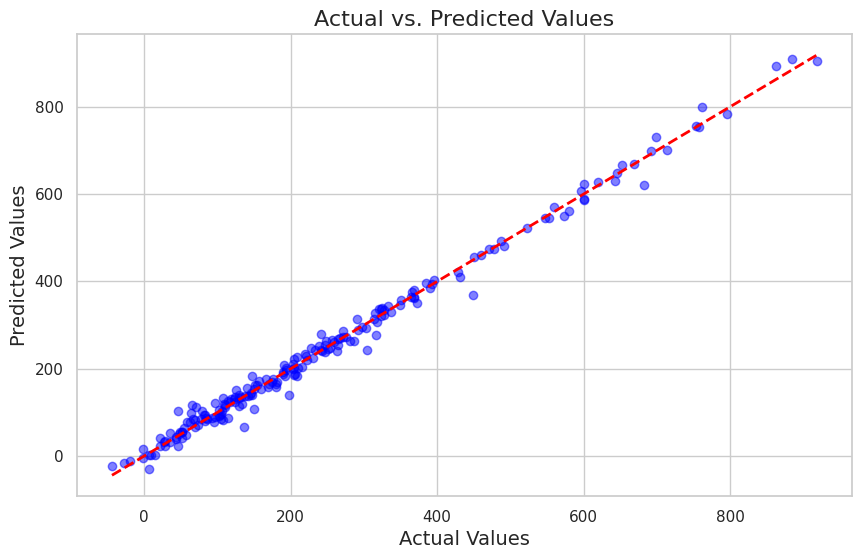

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.show()


#  Find the best hyperparameters for the model

# Normalization

In [21]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [23]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10]

Hyperparameter tuning

In [24]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

In [25]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.0

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

提取最优参数组合

In [26]:
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'epsilon': 10, 'kernel': 'linear'}
Best Score: 0.9936656777967883


# Train a SVM regression model

In [27]:
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)

SVR(C=10, epsilon=10, kernel='linear')

# Make predictions

In [33]:
y_pred = best_svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error: 9.884905519896899
Mean Squared Error: 195.01844672083737
R-squared: 0.9952716368816927
Root Mean Squared Error (RMSE): 13.96490052670757


# Visualize the Results

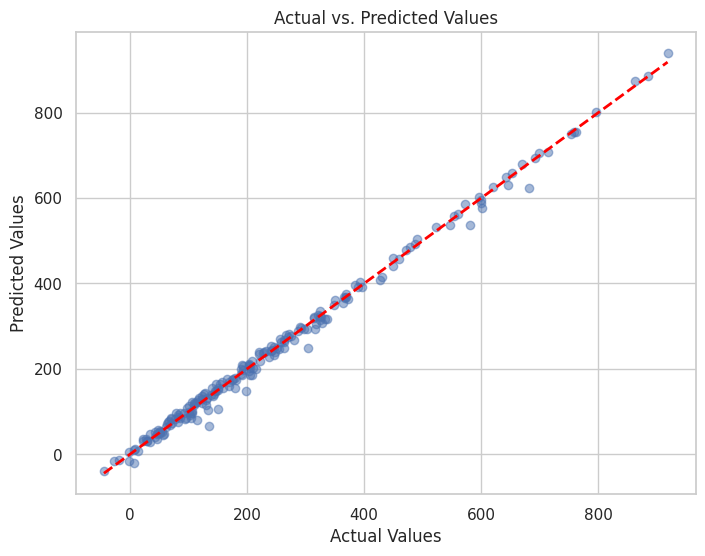

In [29]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()